# Overlaying Foreground and Background Galaxies on Shear and Convergence Maps

##### Spencer Everett, SLAC 2015

We must make sure that our galaxy/halo catalogs are read in correctly before we try and use them. In this demo we make plots of the ray-traced convergence and shear fields, and then overlay the associated foreground galaxies, sized by their stellar mass. This will also enable a consistency check between our maps and halo catalogs.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os, sys, cmath
import astropy.io.fits as pyfits

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import pangloss

## Simulated Halos and Mock Weak Lensing Data

First we set up the objects we need: a convergence map and a shear map, and then two catalogs: halos with galaxies in in the foreground, and a synthetic catalog of background galaxies.

In [8]:
K = pangloss.Kappamap(pangloss.demo_data_files['kappa_file'], FITS=False)

In [9]:
S = pangloss.Shearmap([pangloss.demo_data_files['gamma_1_file'], pangloss.demo_data_files['gamma_2_file']], FITS=False)

In [10]:
config = pangloss.Configuration(pangloss.demo_data_files['config_file'])
F = pangloss.ForegroundCatalog(pangloss.demo_data_files['guo_file'], config)

['/Users/pjm/work/stronglensing/H0/lightcones/Pangloss/calib/Millennium/catalog_example.txt']
['/Users/pjm/work/stronglensing/H0/lightcones/Pangloss/calib/Millennium/GGL_los*.fits']


In [11]:
B = pangloss.BackgroundCatalog(sigma_e=0.5) # High ellipticity used to highlight the intrinsic shape of background sources

## Shear and Convergence Map Backdrops

Now we have all the data we need, let's plot the maps and overlay the galaxies - first on the whole catalog, and then in a zoomed-in view. In the second plot, note how the `ShearMap` object gets the subplot region from the current axes, set by the `KappaMap` object.

/Users/pjm/work/stronglensing/LSST/DESC/Pangloss/pangloss/kappamap.py:85: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Kmin = np.min(self.values[0][pix_yi:pix_yf,pix_xi:pix_xf])
/Users/pjm/work/stronglensing/LSST/DESC/Pangloss/pangloss/kappamap.py:86: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Kmax = np.max(self.values[0][pix_yi:pix_yf,pix_xi:pix_xf])
/Users/pjm/work/stronglensing/LSST/DESC/Pangloss/pangloss/shearmap.py:116: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  gamma1 = self.values[0][pix_yi:pix_yf,pix_xi:pix_xf]
/Users/pjm/work/stronglensing/LSST/DESC/Pangloss/pangloss/shearmap.py:117: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  gamma2 = self.values[1][pix_yi:pix_yf,pix_xi:pix_xf]
/Users/pjm/wor

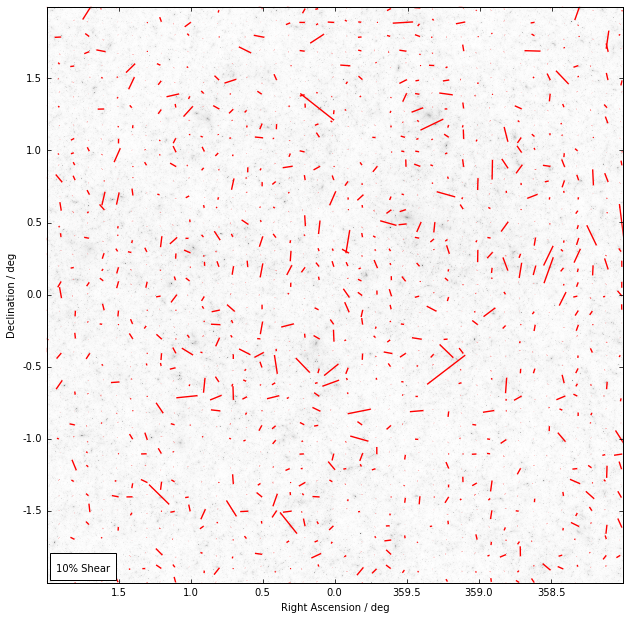

In [12]:
K.plot(fig_size=10)
S.plot(fig_size=10)

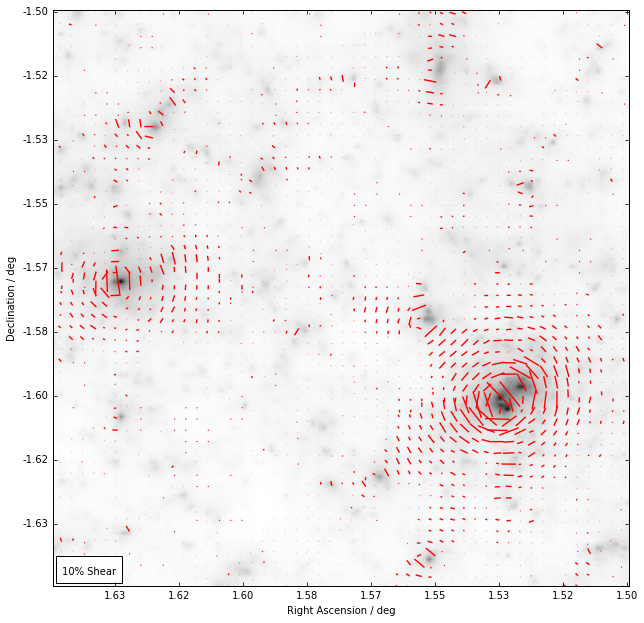

In [14]:
K.plot(fig_size=10, subplot=[1.65, 1.5, -1.65, -1.5])
S.plot()

## Visualizing the Foreground Halos

Now let's overlay the foreground catalog as well:

IndexError: list index out of range

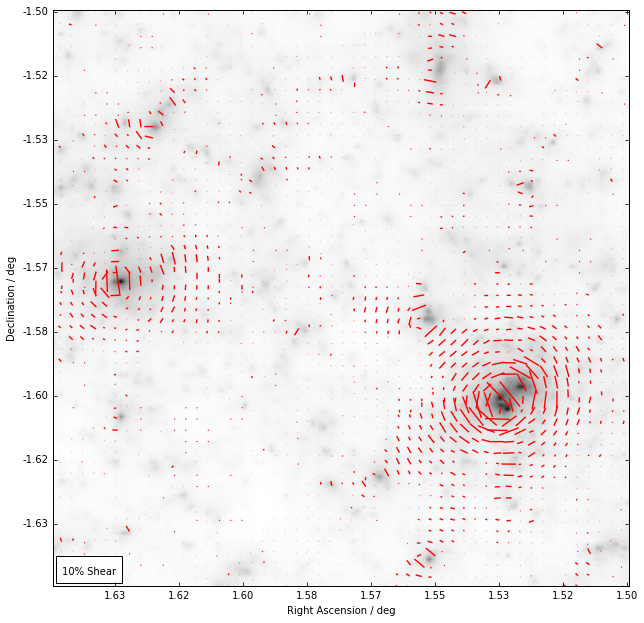

In [20]:
K.plot(fig_size=10, subplot=[1.65, 1.5, -1.65, -1.5])
S.plot()
F.plot(mass_lim=[10**11, 10**12])

`ForegroundCatalog` instances can also plot themselves without any maps as background:

TypeError: 'NoneType' object is not iterable

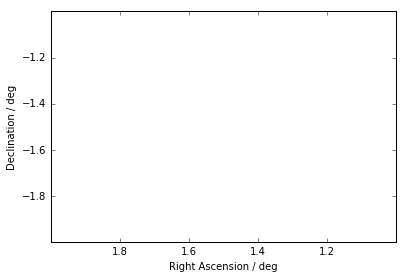

In [21]:
F.plot(fig_size=10, mass_lim=[10**10.75, 10**12])

## Visualizing the Background Galaxies

We can also add a generated background catalog of galaxies to the overlays:

IndexError: list index out of range

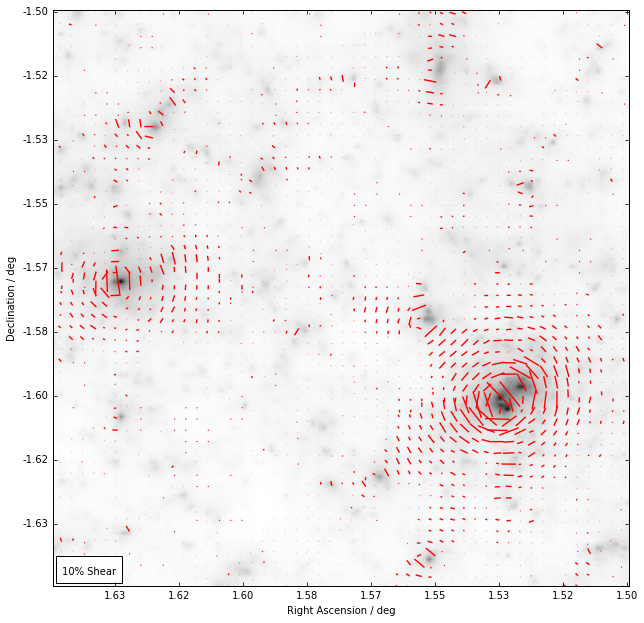

In [22]:
K.plot(fig_size=10, subplot=[1.65, 1.5, -1.65, -1.5])
S.plot()
F.plot(mass_lim=[10**10.75, 10**12]) # Foreground galaxies between stellar mass limits
B.plot(mass_lim=[10**11.95, 10**12]) # Background galaxies, also between stellar mass limits

The background galaxies by default plot as points as there are so numerous (notice the very small mass range allowed in the previous plot). However, they can also be plotted as ellipses to show their intrinsic shape using the optional parameter `graph='ellipse'`. The foreground and background galaxies use the same mass scaling for plotting.

IndexError: list index out of range

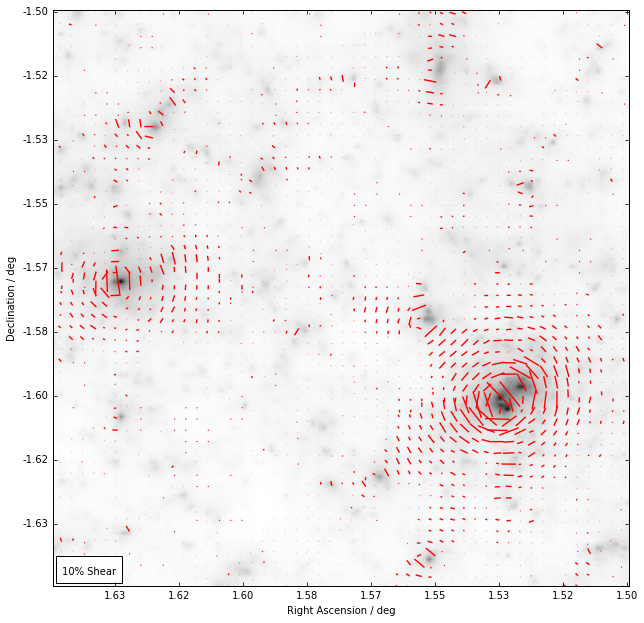

In [23]:
K.plot(fig_size=10, subplot=[1.65, 1.5, -1.65, -1.5])
S.plot()
F.plot(mass_lim=[10**10.75, 10**12])
B.plot(mass_lim=[10**11.95, 10**12],graph='ellipse',lensed='none')

Sometimes it is more convenient to plot the background sources as ellipticity sticks. To do this, simply change the `graph` argument to `stick`. Each ellipticity stick is centered at the location of the source galaxy and has length proportional to the modulus of the ellipticity.

IndexError: list index out of range

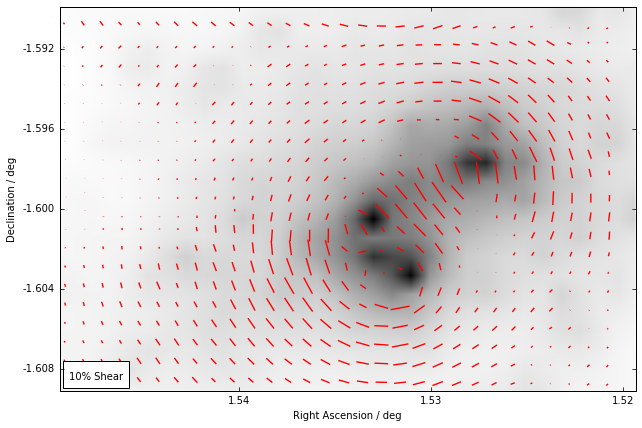

In [24]:
s =[1.55,1.52,-1.61,-1.59] # New, smaller subplot
B = pangloss.BackgroundCatalog(N=15, domain=s, field=[0,0,0,0], sigma_e=0.1) # Using smaller ellipticities now
K.plot(subplot=s)
S.plot()
F.plot(mass_lim=[10**11,10**12])
B.plot(mass_lim=[10**11,10**12], graph='stick', lensed='none')

Like foreground catalogs, a background catalog can also plot itself when no maps are present.

TypeError: 'NoneType' object is not iterable

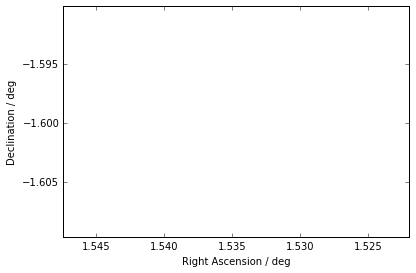

In [25]:
B.plot(fig_size=10, mass_lim=[10**11,10**12], graph='stick', lensed='none')